<a href="https://colab.research.google.com/github/Kwstas-L/Machine-Learning-Content-Analytics/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload the Dataset

* Connect to the github repository to get the datasets and the saved models

In [4]:
! git clone https://github.com/Kwstas-L/Machine-Learning-Content-Analytics.git

Cloning into 'Machine-Learning-Content-Analytics'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 44 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (44/44), done.


In [5]:
# Change Directory to the folder of the project 

%cd Machine-Learning-Content-Analytics

/content/Machine-Learning-Content-Analytics


In [6]:
ls

Code.ipynb                      dataset.json      README.md      train_str.txt
dataset_aueb_argument_v3.json   eu_calls.json     test_arg.txt   valid_arg.txt
dataset_aueb_citations_v2.json  progress_arg.txt  test_str.txt   valid_str.txt
dataset_aueb_structure_v2.json  progress_str.txt  train_arg.txt


# Load Datasets for argument mining

The resulting datasets have one abstract per row. The sentences and the labels are list items. The first sentence of the abstract is its title.

In [7]:
import json
import pandas as pd

# Formating of labels: None -> 0, Evidence -> 1, Claim -> 2

label1id = {
    'NONE': 0,
    'EVIDENCE': 1,
    'CLAIM': 2}

def load_corpus(path, label_mapping=None):
    with open(path) as fp:
        corpus = json.load(fp)

    documents, texts, labels = [], [], []
    for abstract in corpus:
        documents.append(abstract)
        texts.append(corpus[abstract]['sentences'])
        if isinstance(label_mapping, dict):
            labels.append(
                [label_mapping[str(l).upper()]
                    for l in corpus[abstract]['labels']])
        else:
            labels.append([str(l).upper() for l in corpus[abstract]['labels']])

    assert len(texts) == len(labels)
    data = pd.DataFrame(
        zip(documents, texts, labels),
        columns=['document', 'sentences', 'labels'])

    return data

### Load first file `dataset.json`

In [8]:
# Loading first Dataset for arguments

data = load_corpus('dataset.json', label_mapping=label1id)
print(f'Dataset length: {len(data)} abstracts')
data.sample(5)

Dataset length: 1669 abstracts


,document,sentences,labels
1620,11813932,[A comparison of the efficacy and tolerability...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."
1589,16899528,[Selective laser trabeculoplasty versus argon ...,"[0, 0, 0, 0, 0, 0, 1, 2]"
1043,19347979,[Evaluation of glutathione metabolic genes on ...,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2]"
453,GOP_G6B1_PMID_24430366.txt,[Differences between U.S. substance abuse trea...,"[0, 0, 0, 0, 1, 1, 1, 0, 1, 2]"
1665,19383599,[Combined trabeculectomy and cataract extracti...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2]"


### Load second file `dataset.json`

In [9]:
# Formating of labels: Neither -> 0, Evidence -> 1, Claim -> 2

label2id = {
    'NEITHER': 0,
    'EVIDENCE': 1,
    'CLAIM': 2}

# Loading second Dataset for arguments

data2 = load_corpus('dataset_aueb_argument_v3.json', label_mapping=label2id)
print(f'Dataset length: {len(data2)} abstracts')
data2.sample(5)

Dataset length: 1017 abstracts


,document,sentences,labels
961,doi: 10.5194/acp-18-11041-2018,[A model intercomparison of CCN-limited tenuou...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
897,doi: 10.3389/fmicb.2019.00817,[Zika Virus Infection Induces Elevation of Tis...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
62,doi: 10.1002/path.5282,[PGC‐1α deficiency causes spontaneous kidney i...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
350,doi: 10.1029/2018gl079826,[Understanding Rapid Adjustments to Diverse Fo...,"[0, 2, 0, 0, 1, 0, 0]"
677,doi: 10.1111/cts.12551,[Clinical and Functional Relevance of the Mono...,"[0, 0, 0, 0]"


### Combine the two datasets to one

In [10]:
# Combining the two datasets to one

data_total_argument=pd.concat([data, data2], ignore_index=True)
print(f'Dataset length: {len(data_total_argument)} abstracts')
data_total_argument.sample(5)

Dataset length: 2686 abstracts


,document,sentences,labels
385,FOQ_G3B3_PMID30166294.txt,[Title: Defining good health and care from the...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2]"
184,EIK_G4B2_CorpusID_40724119.txt,[﻿Coping and chronic psychosocial consequences...,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, ..."
1895,doi: 10.1016/j.jhep.2020.04.024,[Rebleeding and mortality risk are increased b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, ..."
559,ABC_G1B1_10.1016 j.jclepro.2019.119080.txt,[Solutions for improving the energy efficiency...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0]"
1940,doi: 10.1016/j.vascn.2017.07.003,[Applying label-free dynamic mass redistributi...,"[0, 0, 0, 0, 0, 1, 1, 2]"


In [ ]:
data_total_argument.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   document   2686 non-null   object
 1   sentences  2686 non-null   object
 2   labels     2686 non-null   object
dtypes: object(3)
memory usage: 63.1+ KB


In [ ]:
data_total_argument.describe()

,document,sentences,labels
count,2686,2686,2686
unique,2686,2678,1298
top,19273701,"[Synthesis of Dibenzo[hi,st\n]ovalene and Its ...","[0, 0, 0, 0, 0, 1, 2]"
freq,1,2,40


# Split Documents
For the cases we want the sentences separated, the following splits the documents. I keep the same document index in a new column in order to re-group the sentences to a document (e.g., after predictions).

In [11]:
#@title Split to sentences
sentences = data_total_argument['sentences'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'sentences': 'sentence'})
sentences


,doc_id,sentence
0,0,Gender Differences in Anxiety and Depression b...
1,0,Abstract
2,0,Background/aims: The aim of this prospective s...
3,0,"Methods: AUD severity, state and trait anxiety..."
4,0,Follow-up assessments were performed at 6 and ...
...,...,...
31999,2685,"Instead, SBPs sample a range of conformations ..."
32000,2685,Certain non-transported ligands leave the stru...
32001,2685,"Intriguingly, in some cases, similar SBP confo..."
32002,2685,"In this case, the inability for transport aris..."


In [12]:
#@title Split to labels
labels = data_total_argument['labels'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'labels': 'label'})
labels

,doc_id,label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
31999,2685,0
32000,2685,0
32001,2685,0
32002,2685,0


In [13]:
#@title Regroup document using the index
arguments = pd.merge(sentences,labels, left_index=True, right_index=True).rename( 
    columns = {"doc_id_x" : "doc_id"}).drop( columns= "doc_id_y")
arguments

,doc_id,sentence,label
0,0,Gender Differences in Anxiety and Depression b...,0
1,0,Abstract,0
2,0,Background/aims: The aim of this prospective s...,0
3,0,"Methods: AUD severity, state and trait anxiety...",0
4,0,Follow-up assessments were performed at 6 and ...,0
...,...,...,...
31999,2685,"Instead, SBPs sample a range of conformations ...",0
32000,2685,Certain non-transported ligands leave the stru...,0
32001,2685,"Intriguingly, in some cases, similar SBP confo...",0
32002,2685,"In this case, the inability for transport aris...",0


### Extract - Transform data to X & Y

In [14]:
# The raw input (sentences)
X_arguments = arguments['sentence']

X_arguments.head(12)

0     Gender Differences in Anxiety and Depression b...
1                                              Abstract
2     Background/aims: The aim of this prospective s...
3     Methods: AUD severity, state and trait anxiety...
4     Follow-up assessments were performed at 6 and ...
5     A between- and within-subjects analyses explor...
6     The predictive value of anxiety and depression...
7     Results: Females had higher levels of anxiety ...
8     Trait anxiety and depression significantly inc...
9     Both state and trait anxiety levels at the 6-m...
10    Conversely, in females, depression level at th...
11    Conclusions: In both genders, the psychopathol...
Name: sentence, dtype: object

In [15]:
# The raw output (Labels : Neither / None -> 0, Evidence -> 1, Claim -> 2)
y_arguments = arguments['label']

y_arguments.head(12)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    2
Name: label, dtype: object

### Splitting Dataset Procedure

---
* Training dataset
* Validation dataset
* Test dataset (unseen dataset)
---
At first, we will split the Original dataset into two parts:

* Train-Validation dataset
* Test dataset 

Secondly, we will split the Train-Validation dataset into another two parts:
* Train dataset
* Validation dataset

#### Note: Stratified sampling was used


In [16]:
from sklearn.model_selection import train_test_split

X_train_val_arg, X_test_arg, y_train_val_arg, y_test_arg = train_test_split(X_arguments,
                                                            y_arguments,
                                                            test_size=0.10, # 10 %
                                                            random_state=10,
                                                            stratify=y_arguments)

In [17]:
X_train_arg, X_val_arg, y_train_arg, y_val_arg = train_test_split(X_train_val_arg,
                                                  y_train_val_arg,
                                                  test_size=0.11, # 11 %
                                                  random_state=50,
                                                  stratify=y_train_val_arg)

In [18]:
print(f'X_train_val_arg shape: {X_train_val_arg.shape}')
print(f'y_train_val_arg shape: {y_train_val_arg.shape}')
print()

print(f'X_train_arg shape: {X_train_arg.shape}')
print(f'y_train_arg shape: {y_train_arg.shape}')
print()

print(f'X_val_arg shape: {X_val_arg.shape}')
print(f'y_val_arg shape: {y_val_arg.shape}')

print()
print(f'X_test_arg shape: {X_test_arg.shape}')
print(f'y_test_arg shape: {y_test_arg.shape}')

X_train_val_arg shape: (28803,)
y_train_val_arg shape: (28803,)

X_train_arg shape: (25634,)
y_train_arg shape: (25634,)

X_val_arg shape: (3169,)
y_val_arg shape: (3169,)

X_test_arg shape: (3201,)
y_test_arg shape: (3201,)


# Baseline Model for Arguments - Lexicon Approach

To perform argument (neither, evidence, claim) prediction 3 lexicons were created.

1. Contains a lexicon of all tokens from the training dataset
2. Contains a lexicon of all tokens that are labeled evidence in the training dataset
3. Contains a lexicon of all tokens that are labeled claim in the training dataset

The 50 most common words of each lexicon were compared to each other and their difference was used for validation. 

At the validation step 3 different approaches were used.
1. All the words contained in the difference of the two sets was used for prediction
2. The top 10 words contained in the difference of the two sets was used for prediction
3. The top 5 words contained in the difference of the two sets was used for prediction 

Evaluation metrics were explored for the best model (top 5 words) compared to the test dataset.

Import nltk library to be used for tokenization and the lexicon creation

In [19]:
import nltk
from pprint import pprint

nltk.download('punkt')
nltk.download(u'stopwords')

nltk.__version__

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'3.2.5'

### Lexicon Formation

To create the lexicons the below function must be initiated.

This function breaks each sentence of a dataset to its tokens by keeping only lower case alphabetical characters and removing all stopwords. 

In [17]:
from nltk import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

def create_vocabulary(data):

  tokenizer = RegexpTokenizer(r'[a-zA-Z]+') # keep only characters a-z or A-Z
  en_stop = stopwords.words('english') # english stopwords

  vocabulary=[]
  
  for text in data:
    text = text.lower().strip()
    tokens = tokenizer.tokenize(text)
    filtered = [w for w in tokens if w not in en_stop]
    vocabulary.extend(filtered)

  return vocabulary

Create a vocabulary with all tokens from the argument training dataset

In [19]:
vocabulary_arg = create_vocabulary(X_train_arg) # the training dataset vocabulary for all the arguments

count_vocabulary_arg = Counter(vocabulary_arg)
top_10_words_in_arg = count_vocabulary_arg.most_common(10)
print("Top 10 words:\n")
top_10_words_in_arg

Top 10 words:



[('patients', 3515),
 ('p', 2166),
 ('study', 1956),
 ('health', 1771),
 ('group', 1628),
 ('treatment', 1511),
 ('women', 1340),
 ('cancer', 1297),
 ('results', 1237),
 ('climate', 1222)]

Locate the sentences labeled as evidence or claim in the training dataset to be used in for their corresponding lexicons

In [20]:
# create a list with the location of the sentences labeled 1 : evidence or 2 : claim in the training argument dataset

def locate_argument(dataset,label_id=0):

  labeled_argument = []

  for location , label in enumerate(dataset):
    if (label == label_id):
      labeled_argument.append(location)

  return labeled_argument

labeled_argument_evidence = locate_argument(y_train_arg,1)

labeled_argument_claim = locate_argument(y_train_arg,2)

print("Number of sentences labeled 1 & 2 in the y_train_arg dataset: ",len(locate_argument(y_train_arg,1)),"+",len(locate_argument(y_train_arg,2)))

print("Number of sentences labeled 1 & 2 in the y_val_arg dataset: ",len(locate_argument(y_val_arg,1)),"+",len(locate_argument(y_val_arg,2)))

print("Number of sentences labeled 1 & 2 in the y_test_arg dataset: ",len(locate_argument(y_test_arg,1)),"+",len(locate_argument(y_test_arg,2)))

print("Total",len(arguments[arguments["label"]!=0]))

Number of sentences labeled 1 & 2 in the y_train_arg dataset:  4974 + 2738
Number of sentences labeled 1 & 2 in the y_val_arg dataset:  615 + 339
Number of sentences labeled 1 & 2 in the y_test_arg dataset:  621 + 342
Total 9629


Create a vocabulary with all tokens from the argument training dataset for the sentences labeled as evidence

In [21]:
vocabulary_arg_evidence = create_vocabulary(X_train_arg.iloc[labeled_argument_evidence]) # the training dataset vocabulary with only the arguments labeled as evidence

count_vocabulary_arg_evidence = Counter(vocabulary_arg_evidence)
top_10_words_in_arg_evidence = count_vocabulary_arg_evidence.most_common(10)
print("Top 10 words:\n")
top_10_words_in_arg_evidence

Top 10 words:



[('p', 1754),
 ('group', 886),
 ('patients', 836),
 ('ci', 602),
 ('months', 495),
 ('significant', 483),
 ('significantly', 465),
 ('results', 391),
 ('compared', 379),
 ('higher', 345)]

Create a vocabulary with all tokens from the argument training dataset for the sentences labeled as claim

In [22]:
vocabulary_arg_claim = create_vocabulary(X_train_arg.iloc[labeled_argument_claim]) # the training dataset vocabulary with only the arguments labeled as claim

count_vocabulary_arg_claim = Counter(vocabulary_arg_claim)
top_10_words_in_arg_claim = count_vocabulary_arg_claim.most_common(10)
print("Top 10 words:\n")
top_10_words_in_arg_claim

Top 10 words:



[('patients', 419),
 ('treatment', 251),
 ('results', 227),
 ('cancer', 206),
 ('health', 206),
 ('study', 200),
 ('may', 192),
 ('conclusions', 191),
 ('conclusion', 169),
 ('climate', 162)]

### Find the difference between each lexicon

Vocabularies with the 50 most encountered tokens 

In [23]:
# from the whole train dataset
most_common_vocab = sorted(count_vocabulary_arg, key = count_vocabulary_arg.get, reverse=True)[:50] 

# only claims from the train dataset
most_common_vocab_claims = sorted(count_vocabulary_arg_claim, key = count_vocabulary_arg_claim.get, reverse=True)[:50]

# only evidence from the train dataset
most_common_vocab_evidence = sorted(count_vocabulary_arg_evidence, key = count_vocabulary_arg_evidence.get, reverse=True)[:50]

Create sets for each vocabulary and determine their difference

In [24]:
set_words_arg = set(most_common_vocab)
set_claim_words = set(most_common_vocab_claims)
set_evidence_words = set(most_common_vocab_evidence)

diff_total_to_claims = set_claim_words - set_words_arg
diff_total_to_evidence = set_evidence_words - set_words_arg

print("Most common Tokens encountered mostly in the sentences labeled claim:",len(diff_total_to_claims))
print("Most common Tokens encountered mostly in the sentences labeled evidence:",len(diff_total_to_evidence))

Most common Tokens encountered mostly in the sentences labeled claim: 20
Most common Tokens encountered mostly in the sentences labeled evidence: 22


In [25]:
# words mostly used for one of the labels

def words_mostly_used(diff,count, print_1 = "print"):

  words_used = {}
  for word in diff:
    words_used [word] =  count[word]

  sorted_list_of_counted_words = []
  sorted_list_of_counted_words = sorted(words_used, key = words_used.get, reverse=True) [:50]

  if (print_1 != "print"):
    for w in sorted_list_of_counted_words:
      print(w, count[w])
  else:
    return sorted_list_of_counted_words

Most used words in sentences labeled as claim

In [26]:
words_mostly_used(diff_total_to_claims,count_vocabulary_arg_claim, print)
words_baseline_model_claim = words_mostly_used(diff_total_to_claims,count_vocabulary_arg_claim)

may 192
conclusions 191
conclusion 169
effective 130
findings 120
suggest 105
qol 102
could 101
effect 93
improve 91
advanced 88
overall 87
therapy 87
future 84
however 82
better 80
increased 80
response 78
term 77
improved 77


Most used words in sentences labeled as evidence

In [27]:
words_mostly_used(diff_total_to_evidence,count_vocabulary_arg_evidence, print)
words_baseline_model_evidence= words_mostly_used(diff_total_to_evidence,count_vocabulary_arg_evidence)

respectively 331
vs 283
difference 254
increased 242
median 232
baseline 225
differences 220
lower 219
showed 217
observed 210
scores 202
arm 201
found 197
reported 196
overall 191
year 189
rate 187
versus 186
mm 178
per 174
control 168
levels 166


The two sets (claim & evidence) have common words

In [28]:
# Common tokens in the two lists

common_tokens_in_the_2_lists = list(set(words_baseline_model_claim).intersection(words_baseline_model_evidence))
common_tokens_in_the_2_lists

['increased', 'overall']

These words will be predicted as evidence if encounterd in our predictions as they are mostly used in that context

In [ ]:
print(" # of occurences 'increased' in claims:",count_vocabulary_arg_claim["increased"])
print(" # of occurences 'increased' in evidence:",count_vocabulary_arg_evidence["increased"])
print(" # of occurences 'overall' in claims:",count_vocabulary_arg_claim["overall"])
print(" # of occurences 'overall' in evidence:",count_vocabulary_arg_evidence["overall"])

 # of occurences 'increased' in claims: 80
 # of occurences 'increased' in evidence: 242
 # of occurences 'overall' in claims: 87
 # of occurences 'overall' in evidence: 191


### Validation
The tokens mostly used in claim or evidence sentences where tested to select the best ones for the baseline model

#### Predictions
All the tokens from the words_baseline_model_claim & words_baseline_model_evidence where used

In [29]:
import re

y_predicted_for_validation_all_words = [0] * len(X_val_arg)

for code_word_1 in words_baseline_model_claim: # predict claims

  for index_1 , sentence_1 in enumerate(X_val_arg):
    if re.search(r'\b' + code_word_1 + r'\b', sentence_1.lower()): # make sure that the token encountered is an independent word and not part of it
      if code_word_1 not in common_tokens_in_the_2_lists: # 'Increased' & 'Overall' appear mostly as tokens for evidence
        y_predicted_for_validation_all_words [index_1] = 2

for code_word_2 in words_baseline_model_evidence: # predict evidence

  for index_2 , sentence_2 in enumerate(X_val_arg):
    if re.search(r'\b' + code_word_2 + r'\b', sentence_2.lower()):
      y_predicted_for_validation_all_words [index_2] = 1

The top 10 tokens from the words_baseline_model_claim & words_baseline_model_evidence where used

In [30]:
# The top 10 tokens from the words_baseline_model_claim & words_baseline_model_evidence where used

y_predicted_for_validation_top_10 = [0] * len(X_val_arg)

for code_word_1 in words_baseline_model_claim [:10]:

  for index_1 , sentence_1 in enumerate(X_val_arg):
    if re.search(r'\b' + code_word_1 + r'\b', sentence_1.lower()):
      if code_word_1 not in common_tokens_in_the_2_lists: # 'Increased' & 'Overall' appear mostly as tokens for evidence
        y_predicted_for_validation_top_10 [index_1] = 2

for code_word_2 in words_baseline_model_evidence [:10]:

  for index_2 , sentence_2 in enumerate(X_val_arg):
    if re.search(r'\b' + code_word_2 + r'\b', sentence_2.lower()):
      y_predicted_for_validation_top_10 [index_2] = 1

The top 5 tokens from the words_baseline_model_claim & words_baseline_model_evidence where used

In [31]:
# The top 5 tokens from the words_baseline_model_claim & words_baseline_model_evidence where used

y_predicted_for_validation_top_5 = [0] * len(X_val_arg)

for code_word_1 in words_baseline_model_claim[:5]:
  for index_1 , sentence_1 in enumerate(X_val_arg):
    if re.search(r'\b' + code_word_1 + r'\b', sentence_1.lower()):
      if code_word_1 not in common_tokens_in_the_2_lists: # 'Increased' & 'Overall' appear mostly as tokens for evidence
        y_predicted_for_validation_top_5 [index_1] = 2

for code_word_2 in words_baseline_model_evidence[:5]:
  for index_2 , sentence_2 in enumerate(X_val_arg):
    if re.search(r'\b' + code_word_2 + r'\b', sentence_2.lower()):
      y_predicted_for_validation_top_5 [index_2] = 1

#### Evaluation Metrics

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
conf_mat_all_words = confusion_matrix ( y_true = y_val_arg.to_list(), y_pred = y_predicted_for_validation_all_words)
conf_mat_top_10 = confusion_matrix ( y_true = y_val_arg.to_list(), y_pred = y_predicted_for_validation_top_10)
conf_mat_top_5 = confusion_matrix ( y_true = y_val_arg.to_list(), y_pred = y_predicted_for_validation_top_5)

##### Confusion Matrices

Confusion matrix for all words 

In [35]:
pd.DataFrame( conf_mat_all_words, columns = ["None: 0","Evidence: 1","Claim: 2"], index = ["None: 0","Evidence: 1","Claim: 2"]) 

,None: 0,Evidence: 1,Claim: 2
None: 0,1500,398,317
Evidence: 1,242,313,60
Claim: 2,137,88,114


Confusion matrix for top 10 words 

In [ ]:
pd.DataFrame( conf_mat_top_10, columns = ["None: 0","Evidence: 1","Claim: 2"], index = ["None: 0","Evidence: 1","Claim: 2"])

,None: 0,Evidence: 1,Claim: 2
None: 0,1848,179,188
Evidence: 1,375,198,42
Claim: 2,193,49,97


Confusion matrix for top 5 words 

In [ ]:
pd.DataFrame( conf_mat_top_5, columns = ["None: 0","Evidence: 1","Claim: 2"], index = ["None: 0","Evidence: 1","Claim: 2"])

,None: 0,Evidence: 1,Claim: 2
None: 0,2047,82,86
Evidence: 1,470,124,21
Claim: 2,244,19,76


##### Classification reports


Classification report for all words 

In [ ]:
print( classification_report( y_true = y_val_arg.to_list() , y_pred = y_predicted_for_validation_all_words) )

              precision    recall  f1-score   support

           0       0.80      0.68      0.73      2215
           1       0.39      0.51      0.44       615
           2       0.23      0.34      0.27       339

    accuracy                           0.61      3169
   macro avg       0.47      0.51      0.48      3169
weighted avg       0.66      0.61      0.63      3169



Classification report for top 10 words 

In [ ]:
print( classification_report( y_true = y_val_arg.to_list() , y_pred = y_predicted_for_validation_top_10) )

              precision    recall  f1-score   support

           0       0.76      0.83      0.80      2215
           1       0.46      0.32      0.38       615
           2       0.30      0.29      0.29       339

    accuracy                           0.68      3169
   macro avg       0.51      0.48      0.49      3169
weighted avg       0.66      0.68      0.66      3169



Classification report for top 5 words 

In [36]:
print( classification_report( y_true = y_val_arg.to_list() , y_pred = y_predicted_for_validation_top_5) )

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      2215
           1       0.55      0.20      0.30       615
           2       0.42      0.22      0.29       339

    accuracy                           0.71      3169
   macro avg       0.57      0.45      0.47      3169
weighted avg       0.67      0.71      0.66      3169



### Testing  
**Selected model: top 5 tokens**

Predictions

In [37]:
# Predictions in the test data set

final_baseline_model_claim = words_baseline_model_claim [:5]
final_baseline_model_evidence = words_baseline_model_evidence [:5]

y_predicted_for_testing_arguments = [0] * len(X_test_arg)

for code_word_1 in final_baseline_model_claim :
  for index_1 , sentence_1 in enumerate(X_test_arg):
    if re.search(r'\b' + code_word_1 + r'\b', sentence_1.lower()):
      if code_word_1 not in common_tokens_in_the_2_lists: # 'Increased' & 'Overall' appear mostly as tokens for evidence
        y_predicted_for_testing_arguments [index_1] = 2

for code_word_2 in final_baseline_model_evidence :
  for index_2 , sentence_2 in enumerate(X_test_arg):
    if re.search(r'\b' + code_word_2 + r'\b', sentence_2.lower()):
      y_predicted_for_testing_arguments [index_2] = 1

Confusion Matrix & Classification report for selected baseline model

In [38]:
baseline_final_conf_mat_test = confusion_matrix ( y_true = y_test_arg.to_list(), y_pred = y_predicted_for_testing_arguments)
pd.DataFrame( baseline_final_conf_mat_test, columns = ["None: 0","Evidence: 1","Claim: 2"], index = ["None: 0","Evidence: 1","Claim: 2"])

,None: 0,Evidence: 1,Claim: 2
None: 0,2076,83,79
Evidence: 1,483,126,12
Claim: 2,236,12,94


In [39]:
print( classification_report( y_true = y_test_arg.to_list() , y_pred = y_predicted_for_testing_arguments) )

              precision    recall  f1-score   support

           0       0.74      0.93      0.82      2238
           1       0.57      0.20      0.30       621
           2       0.51      0.27      0.36       342

    accuracy                           0.72      3201
   macro avg       0.61      0.47      0.49      3201
weighted avg       0.68      0.72      0.67      3201



# Load Dataset for Structure mining

The resulting dataset has one abstract per row. The sentences and the labels are list items. The first sentence of the abstract is its title.

**Important note:**

The original `dataset_aueb_structure_v2.json` file has a problematic entry. The doi: 10.1111/jnc.13838 was deleted manually before being saved in the repository

In [21]:
data_structure = load_corpus('dataset_aueb_structure_v2.json')
print(f'Dataset length: {len(data_structure)} abstracts')
data_structure.sample(5)

Dataset length: 1014 abstracts


,document,sentences,labels
195,doi: 10.1016/j.future.2018.08.045,[Patterns for High Performance Multiscale Comp...,"[NEITHER, BACKGROUND, BACKGROUND, BACKGROUND, ..."
273,doi: 10.1016/j.wace.2019.100206,[Experiment design of the International CLIVAR...,"[NEITHER, OBJECTIVE, METHOD, METHOD, METHOD, O..."
956,doi: 10.3934/mine.2018.1.1,[A monolithic algorithm for the simulation of ...,"[NEITHER, OBJECTIVE, METHOD, METHOD, METHOD, M..."
68,doi: 10.1002/qj.3598,[Towards a more reliable historical reanalysis...,"[NEITHER, OBJECTIVE, OBJECTIVE, BACKGROUND, BA..."
47,doi: 10.1002/cphc.201800321,[Design of Perchlorotriphenylmethyl (PTM) Radi...,"[NEITHER, BACKGROUND, BACKGROUND, BACKGROUND, ..."


In [ ]:
data_structure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   document   1014 non-null   object
 1   sentences  1014 non-null   object
 2   labels     1014 non-null   object
dtypes: object(3)
memory usage: 23.9+ KB


In [ ]:
data_structure.describe()

,document,sentences,labels
count,1014,1014,1014
unique,1014,1012,753
top,doi: 10.1038/s41598-018-35422-3,"[Synthesis of Dibenzo[hi,st\n]ovalene and Its ...","[NEITHER, BACKGROUND]"
freq,1,2,10


### Split to sentences and labels and regroup the document


In [22]:
sentences_structure = data_structure['sentences'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'sentences': 'sentence'})
sentences_structure


,doc_id,sentence
0,0,Concordance Between Different Amyloid Immunoas...
1,0,Importance Visual assessment of amyloid positr...
2,0,Several immunoassays have been developed to me...
3,0,The agreement between CSF Aβ42 measures from d...
4,0,Objective To determine the concordance between...
...,...,...
10543,1013,"Instead, SBPs sample a range of conformations ..."
10544,1013,Certain non-transported ligands leave the stru...
10545,1013,"Intriguingly, in some cases, similar SBP confo..."
10546,1013,"In this case, the inability for transport aris..."


In [23]:
labels_structure = data_structure['labels'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'labels': 'label'})
labels_structure

,doc_id,label
0,0,NEITHER
1,0,BACKGROUND
2,0,BACKGROUND
3,0,BACKGROUND
4,0,OBJECTIVE
...,...,...
10543,1013,METHOD
10544,1013,RESULT
10545,1013,RESULT
10546,1013,RESULT


In [24]:
structure = pd.merge(sentences_structure,labels_structure, left_index=True, right_index=True).rename( 
    columns = {"doc_id_x" : "doc_id"}).drop( columns= "doc_id_y")
structure

,doc_id,sentence,label
0,0,Concordance Between Different Amyloid Immunoas...,NEITHER
1,0,Importance Visual assessment of amyloid positr...,BACKGROUND
2,0,Several immunoassays have been developed to me...,BACKGROUND
3,0,The agreement between CSF Aβ42 measures from d...,BACKGROUND
4,0,Objective To determine the concordance between...,OBJECTIVE
...,...,...,...
10543,1013,"Instead, SBPs sample a range of conformations ...",METHOD
10544,1013,Certain non-transported ligands leave the stru...,RESULT
10545,1013,"Intriguingly, in some cases, similar SBP confo...",RESULT
10546,1013,"In this case, the inability for transport aris...",RESULT


# Baseline Model for Structure - labels distribution approach

For this approach the target was to create a dictionary from the training data that categorized a sentence to a label based on its position. 

In more detail to predict the label of a sentence the model compares this abstract with others that have the same number of sentences in them. Then based on the sentence's position in the abstract it selects the label that is most encountered in that position.

The train (90 %) & test (10 %) spliting was at random without replacement on an abstract basis.


### Split data

In [25]:
from random import seed
from random import sample

# select 90 % of doc_id at random from all the structure dataset for training the baseline model

# seed random number generator
seed(10)

# select a subset without replacement
subset = sample(set(structure["doc_id"].unique()) , int(len(data_structure)*0.9)) # 1014 * 0,9 = 912 abstracts were used

print(subset,"\nTest dataset size:",len(set(subset)),"abstracts")


[585, 33, 439, 494, 591, 15, 211, 473, 832, 503, 843, 284, 669, 830, 164, 35, 533, 501, 335, 77, 255, 975, 992, 763, 369, 45, 430, 880, 142, 617, 363, 390, 431, 290, 846, 691, 268, 467, 178, 702, 310, 677, 371, 136, 976, 786, 986, 245, 450, 628, 384, 988, 596, 4, 241, 137, 199, 931, 973, 549, 374, 790, 919, 966, 321, 682, 562, 461, 446, 481, 66, 668, 598, 332, 864, 513, 160, 862, 229, 422, 244, 37, 32, 508, 308, 837, 621, 673, 73, 546, 875, 82, 153, 393, 580, 383, 615, 921, 115, 794, 791, 98, 452, 170, 826, 195, 357, 443, 424, 456, 251, 697, 281, 146, 632, 534, 182, 885, 122, 273, 466, 309, 168, 676, 664, 840, 991, 796, 180, 491, 913, 355, 995, 445, 935, 5, 557, 729, 44, 339, 327, 248, 81, 977, 458, 414, 961, 162, 399, 507, 689, 247, 753, 537, 278, 532, 1010, 616, 511, 64, 910, 996, 690, 472, 410, 139, 987, 554, 941, 907, 551, 397, 852, 718, 169, 572, 451, 101, 425, 36, 2, 449, 548, 943, 51, 358, 94, 155, 111, 622, 464, 818, 496, 985, 469, 945, 793, 938, 457, 351, 743, 265, 807, 714, 8

In [24]:
# doc_id for the training dataset

coplimentary_subset = set(structure["doc_id"].unique()) - set(subset)

print(coplimentary_subset,"\nTrain dataset size:",len(coplimentary_subset),"abstracts")

{517, 521, 530, 20, 541, 544, 553, 559, 49, 55, 575, 68, 70, 582, 586, 83, 595, 603, 104, 110, 112, 114, 117, 629, 630, 638, 134, 143, 151, 678, 683, 687, 176, 181, 693, 183, 184, 698, 712, 203, 207, 209, 220, 748, 238, 242, 756, 759, 249, 764, 257, 261, 271, 788, 280, 799, 801, 806, 298, 812, 305, 314, 317, 331, 848, 345, 352, 364, 876, 370, 886, 377, 889, 895, 899, 388, 900, 903, 909, 411, 412, 419, 934, 429, 942, 950, 952, 963, 965, 454, 971, 972, 979, 468, 982, 998, 999, 1007, 1008, 499, 502, 505} 
Train dataset size: 102 abstracts


###Dictionary of label distribution

Initialize empty dictionary with keys the number of sentences occured in an abstract

In [25]:
dict_distribution = {}
max_sentences = []

for index_str in subset:
  max_sentences.append(len(structure[structure ["doc_id"] == index_str]))

for row in set(max_sentences):
    dict_distribution[row] = {} 
    for idx in range(row):
        dict_distribution[row][idx+1] = []

Populate dictionary

In [26]:
for index_str in subset:
  abstr = structure[structure ["doc_id"] == index_str]
  length_sentence_str = len(abstr)
  i = 1
  for index_str_basel, k in abstr.iterrows():
    a = structure.loc[index_str_basel]["label"]
    b = dict_distribution[length_sentence_str][i]
    b.append(a)
    i = i + 1

In [48]:
# Example

dict_distribution [20] # in our training dataset the abstracts with 20 sentences present the following labels for each sentence

{1: ['NEITHER', 'NEITHER', 'NEITHER'],
 2: ['OBJECTIVE', 'OBJECTIVE', 'BACKGROUND'],
 3: ['OBJECTIVE', 'BACKGROUND', 'BACKGROUND'],
 4: ['OBJECTIVE', 'OBJECTIVE', 'BACKGROUND'],
 5: ['OBJECTIVE', 'OBJECTIVE', 'BACKGROUND'],
 6: ['OBJECTIVE', 'METHOD', 'BACKGROUND'],
 7: ['OBJECTIVE', 'METHOD', 'OBJECTIVE'],
 8: ['OBJECTIVE', 'OBJECTIVE', 'METHOD'],
 9: ['OBJECTIVE', 'RESULT', 'METHOD'],
 10: ['OBJECTIVE', 'RESULT', 'METHOD'],
 11: ['METHOD', 'RESULT', 'METHOD'],
 12: ['OBJECTIVE', 'RESULT', 'METHOD'],
 13: ['OBJECTIVE', 'RESULT', 'METHOD'],
 14: ['OBJECTIVE', 'RESULT', 'RESULT'],
 15: ['OBJECTIVE', 'RESULT', 'RESULT'],
 16: ['OBJECTIVE', 'RESULT', 'RESULT'],
 17: ['CONCLUSION', 'OBJECTIVE', 'RESULT'],
 18: ['OBJECTIVE', 'CONCLUSION', 'CONCLUSION'],
 19: ['OBJECTIVE', 'CONCLUSION', 'CONCLUSION'],
 20: ['OBJECTIVE', 'CONCLUSION', 'OBJECTIVE']}

### Predictions - Testing

Actual labels

In [27]:
# creating a list of the actual labels from the testing dataset

y_actual_structure_baseline = []

for index_str_tr in coplimentary_subset:
  abstr_train = structure[structure ["doc_id"] == index_str_tr]

  for lab_str_bas in abstr_train["label"]:
    y_actual_structure_baseline.append(lab_str_bas)

print(f'{len(y_actual_structure_baseline)} sentences where used for prediction from the 102 abstracts')  

1017 sentences where used for prediction from the 102 abstracts


Predicted labels

In [28]:
# creating a list of the predicted labels from the testing dataset according to the most common from the dictionary previously created

y_predictions_structure_baseline = []

for index_str_tr in coplimentary_subset:
  abstr_train = structure[structure ["doc_id"] == index_str_tr]
  number_of_sentences = len(abstr_train)
  for n in range(number_of_sentences):
    
    try:
      spot = dict_distribution[number_of_sentences][n+1]
    except KeyError:
      spot = dict_distribution[119][119] 
      # if error is raised because the dictionary does not contain this number of sentences
      # get the abstract with the most sentences which exists in this seed (10) for the subsets

    prediction_bas = Counter(spot).most_common(1)[0][0]
    y_predictions_structure_baseline.append(prediction_bas)

print(f'{len(y_predictions_structure_baseline)} sentences where used for prediction from the 102 abstracts') 

1017 sentences where used for prediction from the 102 abstracts


### Evaluation Metrics

Confusion Matrix for distribution based prediction on label structure

In [29]:
conf_matrix_structure_baseline = confusion_matrix ( y_true = y_actual_structure_baseline, y_pred = y_predictions_structure_baseline, 
                                                   labels = ["NEITHER","BACKGROUND","OBJECTIVE","METHOD","RESULT","CONCLUSION"])
pd.DataFrame( conf_matrix_structure_baseline, columns =["NEITHER","BACKGROUND","OBJECTIVE","METHOD","RESULT","CONCLUSION"],
             index = ["NEITHER","BACKGROUND","OBJECTIVE","METHOD","RESULT","CONCLUSION"] )

,NEITHER,BACKGROUND,OBJECTIVE,METHOD,RESULT,CONCLUSION
NEITHER,101,0,1,0,0,0
BACKGROUND,0,173,1,25,26,2
OBJECTIVE,0,64,51,19,35,20
METHOD,0,29,1,52,56,5
RESULT,0,8,0,29,177,23
CONCLUSION,0,2,1,0,23,93


Classification report for distribution based prediction on label structure

In [30]:
print( classification_report( y_true = y_actual_structure_baseline , y_pred = y_predictions_structure_baseline) )

              precision    recall  f1-score   support

  BACKGROUND       0.63      0.76      0.69       227
  CONCLUSION       0.65      0.78      0.71       119
      METHOD       0.42      0.36      0.39       143
     NEITHER       1.00      0.99      1.00       102
   OBJECTIVE       0.93      0.27      0.42       189
      RESULT       0.56      0.75      0.64       237

    accuracy                           0.64      1017
   macro avg       0.70      0.65      0.64      1017
weighted avg       0.68      0.64      0.62      1017



# Text Classification with fastText

### Argument Dataset Transform

In [31]:
arguments

,doc_id,sentence,label
0,0,Gender Differences in Anxiety and Depression b...,0
1,0,Abstract,0
2,0,Background/aims: The aim of this prospective s...,0
3,0,"Methods: AUD severity, state and trait anxiety...",0
4,0,Follow-up assessments were performed at 6 and ...,0
...,...,...,...
31999,2685,"Instead, SBPs sample a range of conformations ...",0
32000,2685,Certain non-transported ligands leave the stru...,0
32001,2685,"Intriguingly, in some cases, similar SBP confo...",0
32002,2685,"In this case, the inability for transport aris...",0


**Use the split datasets to create txt files that have the correct format for the fasttext model**

Merge X & Y datasets

In [54]:
train_arg = pd.merge(y_train_arg,X_train_arg, left_index=True, right_index=True)
val_arg = pd.merge(y_val_arg,X_val_arg, left_index=True, right_index=True)
test_arg = pd.merge(y_test_arg,X_test_arg, left_index=True, right_index=True)

In [55]:
# saving index of each dataset
train_arg_index = train_arg.index
val_arg_index = val_arg.index
test_arg_index = test_arg.index

print("test: ", len(test_arg_index),"sentences",
      "\nvalidation: ", len(val_arg_index),"sentences",
      "\ntrain: ", len(train_arg_index),"sentences")

test:  3201 sentences 
validation:  3169 sentences 
train:  25634 sentences


In [56]:
# create txt file with the correct format that the fasttext model expects to read for training

with open('train_arg.txt', 'w') as train:
  for index in train_arg_index:
    sen = train_arg.loc[index]["sentence"].replace('\n','') # replace new line character with '' for structural consistency
    sen
    label = train_arg.loc[index]["label"]
    train.write(f'__label__{label} {sen}\n')

train.close()

In [ ]:
# create txt file with the correct format that the fasttext model expects to read for validation

with open('valid_arg.txt', 'w') as valid:
  for index in val_arg_index:
    sen = val_arg.loc[index]["sentence"].replace('\n','')
    label = val_arg.loc[index]["label"]
    valid.write(f'__label__{label} {sen}\n')

valid.close()

In [ ]:
# create txt file with the correct format that the fasttext model expects to read for testing

with open('test_arg.txt', 'w') as tes:
  for index in test_arg_index:
    sen = test_arg.loc[index]["sentence"].replace('\n','')
    label = test_arg.loc[index]["label"]
    tes.write(f'__label__{label} {sen}\n')

tes.close()

### Structure Dataset Transform

In [44]:
structure

,doc_id,sentence,label
0,0,Concordance Between Different Amyloid Immunoas...,NEITHER
1,0,Importance Visual assessment of amyloid positr...,BACKGROUND
2,0,Several immunoassays have been developed to me...,BACKGROUND
3,0,The agreement between CSF Aβ42 measures from d...,BACKGROUND
4,0,Objective To determine the concordance between...,OBJECTIVE
...,...,...,...
10543,1013,"Instead, SBPs sample a range of conformations ...",METHOD
10544,1013,Certain non-transported ligands leave the stru...,RESULT
10545,1013,"Intriguingly, in some cases, similar SBP confo...",RESULT
10546,1013,"In this case, the inability for transport aris...",RESULT


#### Splitting Dataset Procedure

---
* Training dataset
* Validation dataset
* Test dataset (unseen dataset)
---
At first, we will split the Original dataset into two parts:

* Train-Validation dataset
* Test dataset 

Secondly, we will split the Train-Validation dataset into another two parts:
* Train dataset
* Validation dataset

#### Note: Stratified sampling was used

In [26]:
# The raw input (sentences)
X_structure = structure['sentence']

X_structure.head(17)

0     Concordance Between Different Amyloid Immunoas...
1     Importance Visual assessment of amyloid positr...
2     Several immunoassays have been developed to me...
3     The agreement between CSF Aβ42 measures from d...
4     Objective To determine the concordance between...
5     Design, Setting, and Participants The study in...
6     Levels of CSF Aβ42 were analyzed using the cla...
7     Concentrations of CSF Aβ were assessed using a...
8     Main Outcomes and Measures The concordance of ...
9     Results Of 262 participants (mean [SD] age, 70...
10    The mass spectrometry–derived Aβ42 values show...
11    The signal in the classic Aβ42-INNOTEST assay ...
12    However, the classic Aβ42-INNOTEST assay showe...
13    The accuracies of the newer assays improved si...
14    A combination of the Aβ42:Aβ40 ratio and T-tau...
15    Conclusions and Relevance Concentrations of CS...
16    These findings suggest the benefit of implemen...
Name: sentence, dtype: object

In [27]:
# The raw output (Labels : "NEITHER","BACKGROUND","OBJECTIVE","METHOD","RESULT","CONCLUSION" )
y_structure = structure['label']

y_structure.head(17)

0        NEITHER
1     BACKGROUND
2     BACKGROUND
3     BACKGROUND
4      OBJECTIVE
5         METHOD
6         METHOD
7         METHOD
8         RESULT
9         RESULT
10        RESULT
11        RESULT
12        RESULT
13        RESULT
14        RESULT
15    CONCLUSION
16    CONCLUSION
Name: label, dtype: object

In [28]:
X_train_val_str, X_test_str, y_train_val_str, y_test_str = train_test_split(X_structure,
                                                            y_structure,
                                                            test_size=0.05, # 5 %
                                                            random_state=10,
                                                            stratify = y_structure)

In [29]:
X_train_str, X_val_str, y_train_str, y_val_str = train_test_split(X_train_val_str,
                                                  y_train_val_str,
                                                  test_size=0.05, # 5 %
                                                  random_state=50,
                                                  stratify = y_train_val_str)

In [30]:
print(f'X_train_val_str shape: {X_train_val_str.shape}')
print(f'y_train_val_str shape: {y_train_val_str.shape}')
print()

print(f'X_train_str shape: {X_train_str.shape}')
print(f'y_train_str shape: {y_train_str.shape}')
print()

print(f'X_val_str shape: {X_val_str.shape}')
print(f'y_val_str shape: {y_val_str.shape}')

print()
print(f'X_test_str shape: {X_test_str.shape}')
print(f'y_test_str shape: {y_test_str.shape}')

X_train_val_str shape: (10020,)
y_train_val_str shape: (10020,)

X_train_str shape: (9519,)
y_train_str shape: (9519,)

X_val_str shape: (501,)
y_val_str shape: (501,)

X_test_str shape: (528,)
y_test_str shape: (528,)


**Use the split datasets to create txt files that have the correct format for the fasttext model**

Merge x & y datasets

In [63]:
train_str = pd.merge(y_train_str,X_train_str, left_index=True, right_index=True)
val_str = pd.merge(y_val_str,X_val_str, left_index=True, right_index=True)
test_str = pd.merge(y_test_str,X_test_str, left_index=True, right_index=True)

In [64]:
# saving index of each dataset
train_str_index = train_str.index
val_str_index = val_str.index
test_str_index = test_str.index

print("test: ", len(test_str_index),"sentences",
      "\nvalidation: ", len(val_str_index),"sentences",
      "\ntrain: ", len(train_str_index),"sentences")

test:  528 sentences 
validation:  501 sentences 
train:  9519 sentences


In [ ]:
# create txt file with the correct format that the fasttext model expects to read for training

with open('train_str.txt', 'w') as train2:
  for index in train_str_index:
    sen = train_str.loc[index]["sentence"].replace('\n','').lower() # replace new line character with '' for structural consistency 
                                                            # keeping only lowercase characters in the structre dataset showed better results
    label = train_str.loc[index]["label"]
    train2.write(f'__label__{label} {sen}\n')

train2.close()

In [ ]:
# create txt file with the correct format that the fasttext model expects to read for validation

with open('valid_str.txt', 'w') as valid2:
  for index in val_str_index:
    sen = val_str.loc[index]["sentence"].replace('\n','').lower()
    label = val_str.loc[index]["label"]
    valid2.write(f'__label__{label} {sen}\n')

valid2.close()

In [ ]:
# create txt file with the correct format that the fasttext model expects to read for testing

with open('test_str.txt', 'w') as tes2:
  for index in test_str_index:
    sen = test_str.loc[index]["sentence"].replace('\n','').lower()
    label = test_str.loc[index]["label"]
    tes2.write(f'__label__{label} {sen}\n')

tes2.close()

# Fasttext implementation for the arguments dataset

The actual model fastText implements is rather simple as we can see in the image below -- the negative log-likelihood the model tries to minimize in training is 

$$ - \frac{1}{N} \sum_{n=1}^{N} y_n \log(f(BAd_n)) $$

where 
- $d_n$ is the representation of the $n$-th document (denoted `hidden` in the image below)
- $A$ is the "document" embedding matrix 
- $B$ is the linear projection from "document" embeddings to output classes
- $f$ is the `softmax` non-linearity function
- $y_n$ is the label of the $n$-th document

In [31]:
# Install fasttext 

!pip install fasttext
import fasttext

     |████████████████████████████████| 68 kB 6.5 MB/s 
  Using cached pybind11-2.7.1-py2.py3-none-any.whl (200 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3094376 sha256=0f4e69b837007b53fdd9a483d173f79783b43f9cf4d63842933602da498cbd74
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [5]:
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!make
!cp fasttext ../
%cd ..

Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.22 MiB | 10.98 MiB/s, done.
Resolving deltas: 100% (2417/2417), done.
/content/Machine-Learning-Content-Analytics/fastText
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/quantmatrix.cc
c++ -pthread -std

### Implementation

In [32]:
# Automatic hyperparameter optimization, default run time is 5 minutes
model_fasttext_arg = fasttext.train_supervised( input = 'train_arg.txt',autotuneValidationFile = "valid_arg.txt" )

**Note: The model used for metrics and the one used for plotting have small differences in their hyperparameters and performance**

In [69]:
# Exexute the same command in the console so the progress file can be used for plotting 

# !./fasttext supervised -input train_arg.txt -output model_fasttext_arg_plot -autotune-validation valid_arg.txt &> progress_arg.txt

In [322]:
# Save model

# model_fasttext_arg.save_model("model_fasttext_arg.bin")

In [ ]:
# Load model 

# model_fasttext_arg = fasttext.load_model("model_fasttext_arg.bin")

### Results - Hyperparameters

In [ ]:
# Dictionary of all words
print("Size = ",len(model_fasttext_arg.words))
# Labels
model_fasttext_arg.labels

Size =  60597


['__label__0', '__label__1', '__label__2']

In [36]:
def print_results(N, p, r):
    print("Number of test observations\t" + str(N))
    print("P@{} : Precision\t\t\t{:.3f}".format(1, p))
    print("R@{} : Recall\t\t\t{:.3f}".format(1, r))

print_results(*model_fasttext_arg.test("test_arg.txt"))

# Number of test observations	3201
# P@1 : Precision			0.794
# R@1 : Recall			0.794

Number of test observations	3201
P@1 : Precision			0.794
R@1 : Recall			0.794


In [ ]:
!./fasttext test model_fasttext_arg_plot.bin test_arg.txt

# N	3201
# P@1	0.789
# R@1	0.789

tcmalloc: large alloc 2819792896 bytes == 0x55f343f84000 @  0x7f7090cf6887 0x55f341590d3f 0x55f3415a029d 0x55f3415a07f1 0x55f3415ad7ed 0x55f341564ae5 0x7f708fd93bf7 0x55f341564b4a
N	3201
P@1	0.789
R@1	0.789


Parameters of the fasttext model for the arguments dataset

Note: The model must be executed and not loaded in orded to print its parameters

In [33]:
def print_parameters1(model_basic_arg):
  print(
    " Model Parameters:","\n",
    "learning rate [0.1]\t\t\t",model_basic_arg.lr,"\n",
    "size of word vectors [100]\t\t",model_basic_arg.dim,"\n",
    "size of the context window [5]\t\t",model_basic_arg.ws,"\n",
    "number of epochs [5]\t\t\t",model_basic_arg.epoch,"\n",
    "minimal number of word occurences [1]\t",model_basic_arg.minCount,"\n",
    "minimal number of label occurences [1]\t",model_basic_arg.minCountLabel,"\n",
    "min length of char ngram [0]\t\t",model_basic_arg.minn,"\n",
    "max length of char ngram [0]\t\t",model_basic_arg.maxn,"\n",
    "number of negatives sampled [5]\t",model_basic_arg.neg,"\n",
    "max length of word ngram [1]\t\t",model_basic_arg.wordNgrams,"\n",
    "number of buckets [2000000]\t\t",model_basic_arg.bucket,"\n",
    "number of threads [number of cpus]\t",model_basic_arg.thread,"\n",
    "sampling threshold [0.0001]\t\t",model_basic_arg.t,"\n",
    "change the rate of updates for the learning rate [100]\t",model_basic_arg.lrUpdateRate,"\n",
    "loss function {ns, hs, softmax, ova} [softmax]\t",model_basic_arg.loss,"\n"
    )

def print_parameters2(model):
  arg_obj = model.f.getArgs()
  for hparam in dir(arg_obj):
      if not hparam.startswith('__'):
          print(f"{hparam} -> {getattr(arg_obj, hparam)}")


In [38]:
print_parameters1(model_fasttext_arg)

#  Model Parameters: 
#  learning rate [0.1]			 0.2028618832874646 
#  size of word vectors [100]		 169 
#  size of the context window [5]		 5 
#  number of epochs [5]			 37 
#  minimal number of word occurences [1]	 1 
#  minimal number of label occurences [1]	 0 
#  min length of char ngram [0]		 0 
#  max length of char ngram [0]		 0 
#  number of negatives sampled [5]	 5 
#  max length of word ngram [1]		 2 
#  number of buckets [2000000]		 4110692 
#  number of threads [number of cpus]	 1 
#  sampling threshold [0.0001]		 0.0001 
#  change the rate of updates for the learning rate [100]	 100 
#  loss function {ns, hs, softmax, ova} [softmax]	 loss_name.softmax 

 Model Parameters: 
 learning rate [0.1]			 0.2028618832874646 
 size of word vectors [100]		 169 
 size of the context window [5]		 5 
 number of epochs [5]			 37 
 minimal number of word occurences [1]	 1 
 minimal number of label occurences [1]	 0 
 min length of char ngram [0]		 0 
 max length of char ngram [0]		 0 
 number of negatives sampled [5]	 5 
 max length of word ngram [1]		 2 
 number of buckets [2000000]		 4110692 
 number of threads [number of cpus]	 1 
 sampling threshold [0.0001]		 0.0001 
 change the rate of updates for the learning rate [100]	 100 
 loss function {ns, hs, softmax, ova} [softmax]	 loss_name.softmax 



In [ ]:
print_parameters2(model_fasttext_arg)

# autotuneDuration -> 300
# autotuneMetric -> f1
# autotuneModelSize -> 
# autotunePredictions -> 1
# autotuneValidationFile -> valid_arg.txt
# bucket -> 4110692
# cutoff -> 0
# dim -> 169
# dsub -> 2
# epoch -> 37
# input -> train_arg.txt
# label -> __label__
# loss -> loss_name.softmax
# lr -> 0.2028618832874646
# lrUpdateRate -> 100
# maxn -> 0
# minCount -> 1
# minCountLabel -> 0
# minn -> 0
# model -> model_name.supervised
# neg -> 5
# output -> 
# pretrainedVectors -> 
# qnorm -> False
# qout -> False
# retrain -> False
# saveOutput -> False
# seed -> 0
# setManual -> <bound method PyCapsule.setManual of <fasttext_pybind.args object at 0x7fb7243e3930>>
# t -> 0.0001
# thread -> 1
# verbose -> 2
# wordNgrams -> 2
# ws -> 5

autotuneDuration -> 300
autotuneMetric -> f1
autotuneModelSize -> 
autotunePredictions -> 1
autotuneValidationFile -> valid_arg.txt
bucket -> 4110692
cutoff -> 0
dim -> 169
dsub -> 2
epoch -> 37
input -> train_arg.txt
label -> __label__
loss -> loss_name.softmax
lr -> 0.2028618832874646
lrUpdateRate -> 100
maxn -> 0
minCount -> 1
minCountLabel -> 0
minn -> 0
model -> model_name.supervised
neg -> 5
output -> 
pretrainedVectors -> 
qnorm -> False
qout -> False
retrain -> False
saveOutput -> False
seed -> 0
setManual -> <bound method PyCapsule.setManual of <fasttext_pybind.args object at 0x7f22f45cf3b0>>
t -> 0.0001
thread -> 1
verbose -> 2
wordNgrams -> 2
ws -> 5


### Evaluation Metrics

Actual labels for the sentences in the test dataset

In [ ]:
y_test_arg

3714     0
11197    1
3510     1
15864    0
29941    0
        ..
23081    0
698      0
19918    2
18171    1
12216    2
Name: label, Length: 3201, dtype: object

Predicted labels for the sentences in the test dataset using FastText

In [ ]:
def predict_fastText(file_to_read,model):
  with open(file_to_read, 'r') as f_read: # test_arg.txt
    lines = f_read.readlines()
    
  predict_list = []

  for line in lines:
    line = line[11:].replace('\n','')
    prediction = model.predict(line)[0][0][-1] # model_fasttext_arg
    predict_list.append(prediction)

  integer_map = map(int, predict_list)
  predictions = list(integer_map)

  return predictions

In [ ]:
y_predictions_arg_fassttext = predict_fastText('test_arg.txt',model_fasttext_arg)
y_predictions_arg_fassttext[:10]

[0, 0, 0, 1, 0, 0, 2, 0, 0, 1]

Confusion Matrix

In [ ]:
conf_fasttext_arg = confusion_matrix ( y_true = y_test_arg.to_list(), y_pred = y_predictions_arg_fassttext)

In [ ]:
pd.DataFrame( conf_fasttext_arg, columns = ["None: 0","Evidence: 1","Claim: 2"], index = ["None: 0","Evidence: 1","Claim: 2"])

,None: 0,Evidence: 1,Claim: 2
None: 0,2042,133,63
Evidence: 1,236,360,25
Claim: 2,149,54,139


Classification Report

In [ ]:
print( classification_report( y_true = y_test_arg.to_list() , y_pred = y_predictions_arg_fassttext) )

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      2238
           1       0.66      0.58      0.62       621
           2       0.61      0.41      0.49       342

    accuracy                           0.79      3201
   macro avg       0.70      0.63      0.66      3201
weighted avg       0.78      0.79      0.78      3201



Average Loss plot 

Note: The Average loss plot does not correspond to our actual trained model

Extract Avg Loss per epoch from the progress file

In [70]:
with open('./progress_arg.txt', 'r') as fp_arg:
  line_arg = fp_arg.read()

progress_arg = line_arg.splitlines() # split lines of the text

stats_arg = []
epochs_arg = []
e_arg = 0
for row in progress_arg:
  if "avg.loss:" in row: # if row contains avg.loss keep the number
    row = float(row [-24:-19]) # keep only avg.loss number 
    stats_arg.append(row)
    epochs_arg.append(e_arg)
    e_arg+=1

print("Avg Loss",stats_arg) 
print("Number of epochs",epochs_arg) 

Avg Loss [0.702, 0.673, 0.641, 0.613, 0.59, 0.567, 0.563, 0.563]
Number of epochs [0, 1, 2, 3, 4, 5, 6, 7]


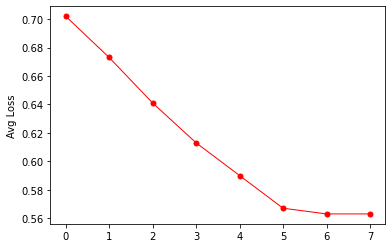

In [72]:
import matplotlib.pyplot as plt

plt.plot(stats_arg,color='red', marker='o',linewidth=1, markersize=5)
plt.ylabel('Avg Loss')
plt.show()

# Fasttext implementation for the structure dataset

### Implementation

In [34]:
# Automatic hyperparameter optimization, default time is 5 minutes (, autotuneDuration=300)
model_fasttext_str = fasttext.train_supervised( input = 'train_str.txt',autotuneValidationFile = "valid_str.txt" )

**Note: The model used for metrics and the one used for plotting have small differences in their hyperparameters and performance**

In [6]:
# Exexute the same command in the console so the progress file can be used for plotting (it was run for 150 sec due to RAM issues)
!./fasttext supervised -input train_str.txt -output model_fasttext_str_plot -autotune-validation valid_str.txt -autotune-duration 150 &> progress_str.txt

In [323]:
# Save model

# model_fasttext_str.save_model("model_fasttext_str.bin")

In [ ]:
# Load model 

# model_fasttext_str = fasttext.load_model("model_fasttext_str.bin")

### Results - Hyperparameters

In [40]:
# Dictionary of all words
print("Size = ",len(model_fasttext_str.words))
# Labels
model_fasttext_str.labels

Size =  28749


['__label__RESULT',
 '__label__BACKGROUND',
 '__label__OBJECTIVE',
 '__label__METHOD',
 '__label__CONCLUSION',
 '__label__NEITHER']

In [41]:
print_results(*model_fasttext_str.test("test_str.txt"))

# Number of test observations	528
# P@1 : Precision			0.648
# R@1 : Recall			0.648

Number of test observations	528
P@1 : Precision			0.648
R@1 : Recall			0.648


In [ ]:
!./fasttext test model_fasttext_str_plot.bin test_str.txt

# N	3201
# P@1	0.788
# R@1	0.788

terminate called after throwing an instance of 'std::invalid_argument'
  what():  model_fasttext_str_plot.bin has wrong file format!


Parameters of the fasttext model for the structure dataset

Note: The model must be executed and not loaded in orded to print its parameters

In [42]:
print_parameters1(model_fasttext_str)

#  Model Parameters: 
#  learning rate [0.1]			 0.08499425639667486 
#  size of word vectors [100]		 92 
#  size of the context window [5]		 5 
#  number of epochs [5]			 100 
#  minimal number of word occurences [1]	 1 
#  minimal number of label occurences [1]	 0 
#  min length of char ngram [0]		 0 
#  max length of char ngram [0]		 0 
#  number of negatives sampled [5]	 5 
#  max length of word ngram [1]		 2 
#  number of buckets [2000000]		 4110692 
#  number of threads [number of cpus]	 1 
#  sampling threshold [0.0001]		 0.0001 
#  change the rate of updates for the learning rate [100]	 100 
#  loss function {ns, hs, softmax, ova} [softmax]	 loss_name.softmax 

 Model Parameters: 
 learning rate [0.1]			 0.08499425639667486 
 size of word vectors [100]		 92 
 size of the context window [5]		 5 
 number of epochs [5]			 100 
 minimal number of word occurences [1]	 1 
 minimal number of label occurences [1]	 0 
 min length of char ngram [0]		 0 
 max length of char ngram [0]		 0 
 number of negatives sampled [5]	 5 
 max length of word ngram [1]		 2 
 number of buckets [2000000]		 4110692 
 number of threads [number of cpus]	 1 
 sampling threshold [0.0001]		 0.0001 
 change the rate of updates for the learning rate [100]	 100 
 loss function {ns, hs, softmax, ova} [softmax]	 loss_name.softmax 



In [43]:
print_parameters2(model_fasttext_str)

# autotuneDuration -> 300
# autotuneMetric -> f1
# autotuneModelSize -> 
# autotunePredictions -> 1
# autotuneValidationFile -> valid_str.txt
# bucket -> 4110692
# cutoff -> 0
# dim -> 92
# dsub -> 2
# epoch -> 100
# input -> train_str.txt
# label -> __label__
# loss -> loss_name.softmax
# lr -> 0.08499425639667486
# lrUpdateRate -> 100
# maxn -> 0
# minCount -> 1
# minCountLabel -> 0
# minn -> 0
# model -> model_name.supervised
# neg -> 5
# output -> 
# pretrainedVectors -> 
# qnorm -> False
# qout -> False
# retrain -> False
# saveOutput -> False
# seed -> 0
# setManual -> <bound method PyCapsule.setManual of <fasttext_pybind.args object at 0x7f22eeb60730>>
# t -> 0.0001
# thread -> 1
# verbose -> 2
# wordNgrams -> 2
# ws -> 5

autotuneDuration -> 300
autotuneMetric -> f1
autotuneModelSize -> 
autotunePredictions -> 1
autotuneValidationFile -> valid_str.txt
bucket -> 4110692
cutoff -> 0
dim -> 92
dsub -> 2
epoch -> 100
input -> train_str.txt
label -> __label__
loss -> loss_name.softmax
lr -> 0.08499425639667486
lrUpdateRate -> 100
maxn -> 0
minCount -> 1
minCountLabel -> 0
minn -> 0
model -> model_name.supervised
neg -> 5
output -> 
pretrainedVectors -> 
qnorm -> False
qout -> False
retrain -> False
saveOutput -> False
seed -> 0
setManual -> <bound method PyCapsule.setManual of <fasttext_pybind.args object at 0x7f2c01094730>>
t -> 0.0001
thread -> 1
verbose -> 2
wordNgrams -> 2
ws -> 5


### Evaluation Metrics

Actual labels for the sentences in the test dataset

In [52]:
y_test_str

7584         RESULT
4579        NEITHER
3598         METHOD
802          METHOD
10010     OBJECTIVE
            ...    
5002      OBJECTIVE
2077     BACKGROUND
6534     BACKGROUND
2245     BACKGROUND
6275         RESULT
Name: label, Length: 528, dtype: object

Predicted labels for the sentences in the test dataset using FastText

In [53]:
def predict_fastText_str(file_to_read,model):
  with open(file_to_read, 'r') as f_read: # test_str.txt
    lines = f_read.readlines()
    
  predict_list = []

  for line in lines:
    try:
      input_line = line.split( maxsplit=1)[1].replace('\n','')
    except IndexError: # a sentence is empty in the test dataset
      input_line = ""
    prediction = model.predict(input_line)[0][0][9:] # model_fasttext_str
    predict_list.append(prediction)
    
  return predict_list

In [54]:
y_predictions_str_fassttext = predict_fastText_str('test_str.txt',model_fasttext_str)
y_predictions_str_fassttext[:10]

['RESULT',
 'NEITHER',
 'BACKGROUND',
 'METHOD',
 'NEITHER',
 'NEITHER',
 'BACKGROUND',
 'BACKGROUND',
 'CONCLUSION',
 'RESULT']

Confusion Matrix

In [55]:
conf_fasttext_str = confusion_matrix ( y_true = y_test_str.to_list(), y_pred = y_predictions_str_fassttext,
                                                   labels = ["NEITHER","BACKGROUND","OBJECTIVE","METHOD","RESULT","CONCLUSION"])
pd.DataFrame( conf_fasttext_str, columns =["NEITHER","BACKGROUND","OBJECTIVE","METHOD","RESULT","CONCLUSION"],
             index = ["NEITHER","BACKGROUND","OBJECTIVE","METHOD","RESULT","CONCLUSION"] )

,NEITHER,BACKGROUND,OBJECTIVE,METHOD,RESULT,CONCLUSION
NEITHER,37,5,4,3,2,0
BACKGROUND,1,82,5,4,10,5
OBJECTIVE,3,14,56,6,12,2
METHOD,0,9,8,43,15,5
RESULT,0,13,5,12,98,7
CONCLUSION,1,10,11,1,13,26


Classification Report

In [56]:
print( classification_report( y_true = y_test_str.to_list() , y_pred = y_predictions_str_fassttext) )

              precision    recall  f1-score   support

  BACKGROUND       0.62      0.77      0.68       107
  CONCLUSION       0.58      0.42      0.49        62
      METHOD       0.62      0.54      0.58        80
     NEITHER       0.88      0.73      0.80        51
   OBJECTIVE       0.63      0.60      0.62        93
      RESULT       0.65      0.73      0.69       135

    accuracy                           0.65       528
   macro avg       0.66      0.63      0.64       528
weighted avg       0.65      0.65      0.64       528



Average Loss plot 

Note: The Average loss plot does not correspond to our actual trained model (trained for half the time)

Extract Avg Loss per epoch from the progress file

In [7]:
with open('./progress_str.txt', 'r') as fp_str:
  line_str = fp_str.read()

progress_str = line_str.splitlines() # split lines of the text

stats_str = []
epochs_str = []
e_str = 0
for row in progress_str:
  if "avg.loss:" in row: # if row contains avg.loss keep the number
    row = float(row [-24:-19]) # keep only avg.loss number 
    stats_str.append(row)
    epochs_str.append(e_str)
    e_str+=1

print("Avg Loss",stats_str) 
print("Number of epochs",epochs_str) 

Avg Loss [1.779, 1.724, 1.652, 1.547, 1.45, 1.354, 1.256, 1.166, 1.077, 0.996, 0.917, 0.856, 0.807, 0.755, 0.71, 0.674, 0.639, 0.607, 0.58, 0.555, 0.528, 0.506, 0.487, 0.468, 0.453, 0.437, 0.424, 0.411, 0.4, 0.386, 0.377, 0.366, 0.355, 0.347, 0.338, 0.33, 0.322, 0.315, 0.309, 0.303, 0.297, 0.29, 0.286, 0.28, 0.274, 0.269, 0.265, 0.26, 0.256, 0.251, 0.247, 0.242, 0.238, 0.234, 0.231, 0.228, 0.224, 0.221, 0.219, 0.216, 0.213, 0.21, 0.207, 0.205, 0.202, 0.2, 0.197, 0.194, 0.193, 0.19, 0.188, 0.186, 0.184, 0.182, 0.179, 0.177, 0.175, 0.173, 0.171, 0.17, 0.168, 0.166, 0.165, 0.163, 0.161, 0.159, 0.158, 0.156, 0.154, 0.153, 0.151, 0.149, 0.148, 0.146, 0.145, 0.143, 0.142, 0.142]
Number of epochs [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77

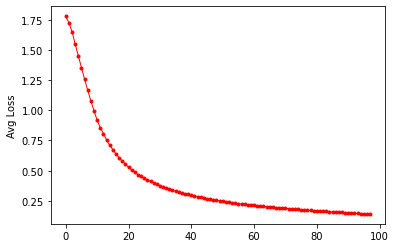

In [10]:
import matplotlib.pyplot as plt

plt.plot(stats_str,color='red', marker='o',linewidth=1, markersize=3)
plt.ylabel('Avg Loss')
plt.show()

# Abstract Clustering

### Extract Argument embeddings

First we create a dataframe that has extra information about the abstracts SDG to be used later for community detection

Note: the dataset.json file was not used due to missing SDG attribute in some cases

In [144]:
def load_doc(path, label_mapping=None):
    with open(path) as fp:
        corpus = json.load(fp)

    documents, texts, labels, SDG = [], [], [], []
    for abstract in corpus:
        documents.append(abstract)
        SDG.append(corpus[abstract]['SDG'])
        texts.append(corpus[abstract]['sentences'])
        if isinstance(label_mapping, dict):
            labels.append(
                [label_mapping[str(l).upper()]
                    for l in corpus[abstract]['labels']])
        else:
            labels.append([str(l).upper() for l in corpus[abstract]['labels']])

    assert len(texts) == len(labels)
    data = pd.DataFrame(
        zip(documents, texts, labels,SDG),
        columns=['document', 'sentences', 'labels','SDG'])

    return data

In [145]:
# Formating of labels: Neither -> 0, Evidence -> 1, Claim -> 2

label2id = {
    'NEITHER': 0,
    'EVIDENCE': 1,
    'CLAIM': 2}

# Loading second Dataset for arguments

data2_SDG = load_doc('dataset_aueb_argument_v3.json', label_mapping=label2id)
print(f'Dataset length: {len(data2_SDG)} abstracts')
data2_SDG.sample(5)

Dataset length: 1017 abstracts


,document,sentences,labels,SDG
72,doi: 10.1007/jhep01(2017)026,[Holographic collisions in non-conformal theor...,"[0, 0, 0, 0, 0, 0]",13
849,doi: 10.1371/journal.pone.0184443,[Urinary Proteomics in Predicting Heart Transp...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",3
181,doi: 10.1016/j.erss.2020.101780,[The desirability of transitions in demand: In...,"[0, 1, 1, 0, 1, 2, 0, 2, 0]",13
939,doi: 10.3390/molecules24061098,[Computational Drug Design Applied to the Stud...,"[0, 0, 0, 0, 0, 0]",3
335,doi: 10.1021/jacs.6b12601,[Tuning the Rectification Ratio by Changing th...,"[0, 0, 0, 0, 0]",3


Then we create a file that has on a row an abstract with the sentences that are labeled evidence or claim

In [147]:
sentences_SDG = data2_SDG['sentences'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'sentences': 'sentence'})
sentences_SDG

,doc_id,sentence
0,0,Concordance Between Different Amyloid Immunoas...
1,0,Importance Visual assessment of amyloid positr...
2,0,Several immunoassays have been developed to me...
3,0,The agreement between CSF Aβ42 measures from d...
4,0,Objective To determine the concordance between...
...,...,...
10570,1016,"Instead, SBPs sample a range of conformations ..."
10571,1016,Certain non-transported ligands leave the stru...
10572,1016,"Intriguingly, in some cases, similar SBP confo..."
10573,1016,"In this case, the inability for transport aris..."


In [148]:
labels_SDG = data2_SDG['labels'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'labels': 'label'})
labels_SDG

,doc_id,label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
10570,1016,0
10571,1016,0
10572,1016,0
10573,1016,0


In [149]:
arguments_SDG = pd.merge(sentences_SDG,labels_SDG, left_index=True, right_index=True).rename( 
    columns = {"doc_id_x" : "doc_id"}).drop( columns= "doc_id_y")
arguments_SDG

,doc_id,sentence,label
0,0,Concordance Between Different Amyloid Immunoas...,0
1,0,Importance Visual assessment of amyloid positr...,0
2,0,Several immunoassays have been developed to me...,0
3,0,The agreement between CSF Aβ42 measures from d...,0
4,0,Objective To determine the concordance between...,0
...,...,...,...
10570,1016,"Instead, SBPs sample a range of conformations ...",0
10571,1016,Certain non-transported ligands leave the stru...,0
10572,1016,"Intriguingly, in some cases, similar SBP confo...",0
10573,1016,"In this case, the inability for transport aris...",0


In [146]:
# Example of the first abstract
" ".join(data2_SDG.iloc[0][1])

'Concordance Between Different Amyloid Immunoassays and Visual Amyloid Positron Emission Tomographic Assessment Importance Visual assessment of amyloid positron emission tomographic (PET) images has been approved by regulatory authorities for clinical use. Several immunoassays have been developed to measure β-amyloid (Aβ) 42 in cerebrospinal fluid (CSF). The agreement between CSF Aβ42 measures from different immunoassays and visual PET readings may influence the use of CSF biomarkers and/or amyloid PET assessment in clinical practice and trials. Objective To determine the concordance between CSF Aβ42 levels measured using 5 different immunoassays and visual amyloid PET analysis. Design, Setting, and Participants The study included 262 patients with mild cognitive impairment or subjective cognitive decline from the Swedish BioFINDER (Biomarkers for Identifying Neurodegenerative Disorders Early and Reliably) cohort (recruited from September 1, 2010, through December 31, 2014) who had und

In [150]:
# Filter sentences of abstracts that are labeled either claim or evidence
Labeled_sent = arguments_SDG[arguments_SDG["label"]!=0]
Labeled_sent

,doc_id,sentence,label
8,0,Main Outcomes and Measures The concordance of ...,1
9,0,"Results Of 262 participants (mean [SD] age, 70...",1
10,0,The mass spectrometry–derived Aβ42 values show...,1
11,0,The signal in the classic Aβ42-INNOTEST assay ...,1
12,0,"However, the classic Aβ42-INNOTEST assay showe...",1
...,...,...,...
10554,1014,Our study generalizes a previous one by Fukush...,1
10556,1014,Our preliminary results on coarse lattices sho...,2
10563,1015,We propose that GLP-1/Notch promotes reprogram...,1
10564,1015,"These findings have wide implications, ranging...",2


In [151]:
# Group these sentences to their abstract
sent_to_embed = Labeled_sent.groupby(['doc_id']).agg({'sentence': lambda x: " ".join(x),}).reset_index()
sent_to_embed

,doc_id,sentence
0,0,Main Outcomes and Measures The concordance of ...
1,1,Main Outcomes and Measures Plasma neurofilamen...
2,2,When the system is sheared under steady state ...
3,3,"This increase was simulated in two ways, namel..."
4,4,Here we show that the effects of switching off...
...,...,...
780,1008,Our results demonstrate that the generalized P...
781,1011,These show that higher values of P* generally ...
782,1014,Our study generalizes a previous one by Fukush...
783,1015,We propose that GLP-1/Notch promotes reprogram...


In [152]:
# Example of arguments for the first abstract
sent_to_embed.iloc[0][1]

'Main Outcomes and Measures The concordance of CSF Aβ42 levels and Aβ42:Aβ40 and Aβ42:tau ratios with visual [18F]flutemetamol PET status. Results Of 262 participants (mean [SD] age, 70.9 [5.5] years), 108 were women (41.2%) and 154 were men (58.8%). The mass spectrometry–derived Aβ42 values showed higher correlations with the modified Aβ42-INNOTEST (r\u2009=\u20090.97), Aβ42-FL (r\u2009=\u20090.93), Aβ42-EI (r\u2009=\u20090.93), and Aβ42-MSD (r\u2009=\u20090.95) assays compared with the classic Aβ42-INNOTEST assay (r\u2009=\u20090.88;P\u2009≤\u2009.01). The signal in the classic Aβ42-INNOTEST assay was partly quenched by recombinant Aβ1-40 peptide. However, the classic Aβ42-INNOTEST assay showed better concordance with visual [18F]flutemetamol PET status (area under the receiver operating characteristic curve [AUC], 0.92) compared with the newer assays (AUCs, 0.87-0.89;P\u2009≤\u2009.01). The accuracies of the newer assays improved significantly when Aβ42:Aβ40 (AUCs, 0.93-0.95;P\u2009

In [153]:
# Example of the embedding of the first abstract from the fasttext model previously created
model_fasttext_arg.get_sentence_vector(sent_to_embed.iloc[0][1])

array([ 1.26103433e-02, -8.49280134e-03,  4.93650325e-03,  9.52201057e-03,
       -8.57235491e-03,  2.76219193e-03, -4.17466043e-03,  5.98104112e-03,
       -1.66049432e-02, -9.49306122e-04, -8.00562208e-04, -7.76595389e-03,
       -1.82340015e-03,  4.20490833e-04,  1.84820034e-03,  1.40362908e-03,
       -4.80356440e-03, -2.46746186e-03, -4.33307234e-03,  5.00093633e-03,
       -7.90022837e-04, -4.46710130e-03, -1.04263925e-03,  1.14680994e-02,
       -1.52250538e-02,  1.40701840e-02,  8.30857269e-03,  2.00878177e-03,
       -1.75818591e-03, -8.08106270e-03,  1.12065701e-02,  4.42789169e-03,
        1.49900967e-03, -1.96163193e-03,  1.27764093e-02,  5.76506834e-03,
        2.30982876e-03, -9.95016424e-04, -2.81540677e-03,  4.00418555e-03,
       -1.85032990e-02,  1.49014418e-03, -7.10804341e-03, -7.30554434e-03,
        3.31254746e-03,  1.97431678e-03, -1.22559490e-03,  1.42844918e-03,
        7.78315496e-03, -7.17873080e-03,  1.58506110e-02, -5.65500325e-03,
        7.35726720e-03, -

### Similarity - distance between argument embeddings

In [154]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial

In [155]:
# Similarity - Distance calculation Example
a1 = model_fasttext_arg.get_sentence_vector(sent_to_embed.iloc[0][1]).reshape(1, -1)
a2 = model_fasttext_arg.get_sentence_vector(sent_to_embed.iloc[1][1]).reshape(1, -1)

In [156]:
print("Distance between first 2 abstracts:",pairwise_distances(a1,a2))
print("Distance between first abstract and itself:",pairwise_distances(a1,a1))
print("Similarity between first 2 abstracts:",cosine_similarity(a1,a2))
print("Similarity between first abstract and itself:",cosine_similarity(a1,a1))

Distance between first 2 abstracts: [[0.05443469]]
Distance between first abstract and itself: [[0.]]
Similarity between first 2 abstracts: [[0.90908474]]
Similarity between first abstract and itself: [[1.0000001]]


**Create a dictionary of abstracts with values the top 5 most similar abstracts to them with regards to cosine similarity calculated from embeddings of the sentences labeled as claim or evidence in the abstract**

Note: It takes approximately 6 minutes to calculate

In [157]:
from tqdm import tqdm

In [158]:
simil_node = {}

for x1,x2 in tqdm(sent_to_embed.iterrows()):
  
  list_similarity = []
  a1 = model_fasttext_arg.get_sentence_vector(x2[1]).reshape(1, -1) # calculate embedding

  for x3,x4 in sent_to_embed.iterrows():
    a2 = model_fasttext_arg.get_sentence_vector(x4[1]).reshape(1, -1) # calculate embedding
    
    abstr_similarity = cosine_similarity(a1,a2)[0][0] # calculate cosine similarity betweeen two abstracts
    to_append = (x3,abstr_similarity)
    list_similarity.append(to_append)
  
  list_similarity = sorted(list_similarity, key=lambda t: t[1],reverse=True) # sort list to nodes with higher similarity
  simil_node [x1] = list_similarity[1:6] # 5 closest argument embeddings 


785it [06:02,  2.17it/s]


In [159]:
#  Example of Most similar abstracts to the first abstract
simil_node[0]

[(195, 0.9996967),
 (694, 0.9995627),
 (572, 0.99953395),
 (143, 0.9994927),
 (519, 0.99948275)]

In [160]:
# save dictionary to a word file
with open('similarity.txt', 'w') as convert_file:
  convert_file.write(str(simil_node))

In [325]:
# load dictionary from word file

import ast

with open('similarity.txt', 'r') as fp1:
  # simil_node_loaded = fp1.readlines()
  contents = fp1.read()
  simil_node_loaded = ast.literal_eval(contents)

### Graph

Create Undirected Graph

In [165]:
import networkx as nx

In [183]:
G = nx.Graph()

Add nodes

In [167]:
data2_SDG

,document,sentences,labels,SDG
0,doi: 10.1001/jamaneurol.2017.2814,[Concordance Between Different Amyloid Immunoa...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...",3
1,doi: 10.1001/jamaneurol.2017.4913,[Association of Changes in Plasma Neurofilamen...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]",3
2,doi: 10.1002/2015gl067056,[Dynamically triggered slip leading to sustain...,"[0, 0, 0, 1, 1, 2]",13
3,doi: 10.1002/2015ms000564,[Impacts of parameterized orographic drag on t...,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2]",13
4,doi: 10.1002/2016gl069551,"[Climate model biases in jet streams, blocking...","[0, 0, 0, 0, 0, 1, 2]",13
...,...,...,...,...
1012,doi: 10.5194/tc-13-1325-2019,[Winter tourism under climate change in the Py...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",13
1013,doi: 10.5194/tc-13-521-2019,[On the timescales and length scales of the Ar...,"[0, 0, 0, 0, 0, 0, 0, 0, 0]",13
1014,doi: 10.5506/aphyspolbsupp.9.603,[A Real-time Lattice Simulation of the Thermal...,"[0, 0, 0, 1, 0, 2]",13
1015,doi: 10.7554/elife.15477,[Increasing Notch signaling antagonizes PRC2-m...,"[0, 0, 0, 0, 0, 0, 1, 2]",3


In [184]:
def add_node_in_graph(graph,n_i,doi_attribute,SDG_attribute):
  graph.add_nodes_from([(n_i,{"doi":doi_attribute,"SDG":SDG_attribute})])

In [185]:
for n_i , m_i in sent_to_embed.iterrows():
  doi_attribute = data2_SDG["document"].iloc[m_i[0]]
  SDG_attribute = data2_SDG["SDG"].iloc[m_i[0]]
  add_node_in_graph(G,n_i,doi_attribute,SDG_attribute)

In [186]:
print("Number of Nodes: ",G.number_of_nodes())

Number of Nodes:  785


In [187]:
G.nodes.data()

NodeDataView({0: {'doi': 'doi: 10.1001/jamaneurol.2017.2814', 'SDG': '3'}, 1: {'doi': 'doi: 10.1001/jamaneurol.2017.4913', 'SDG': '3'}, 2: {'doi': 'doi: 10.1002/2015gl067056', 'SDG': '13'}, 3: {'doi': 'doi: 10.1002/2015ms000564', 'SDG': '13'}, 4: {'doi': 'doi: 10.1002/2016gl069551', 'SDG': '13'}, 5: {'doi': 'doi: 10.1002/2016jb013545', 'SDG': '13'}, 6: {'doi': 'doi: 10.1002/2016ms000630', 'SDG': '13'}, 7: {'doi': 'doi: 10.1002/acr.23497', 'SDG': '3'}, 8: {'doi': 'doi: 10.1002/adma.201500940', 'SDG': '3'}, 9: {'doi': 'doi: 10.1002/adma.201600651', 'SDG': '3'}, 10: {'doi': 'doi: 10.1002/adma.201702469', 'SDG': '3'}, 11: {'doi': 'doi: 10.1002/adma.201804450', 'SDG': '3'}, 12: {'doi': 'doi: 10.1002/adts.201900125', 'SDG': '3'}, 13: {'doi': 'doi: 10.1002/aenm.201701021', 'SDG': '13'}, 14: {'doi': 'doi: 10.1002/ange.201705721', 'SDG': '13'}, 15: {'doi': 'doi: 10.1002/anie.201509875', 'SDG': '3'}, 16: {'doi': 'doi: 10.1002/anie.201603298', 'SDG': '13'}, 17: {'doi': 'doi: 10.1002/anie.20160665

Add Weighted Edges

In [191]:
for key in simil_node_loaded:
  for num ,top_5 in enumerate(simil_node_loaded[key]):
    n_node = top_5[0] # neighboring node
    n_node_simil = top_5[1] # similarity
    G.add_weighted_edges_from([(key,n_node,n_node_simil)])

In [192]:
print("Number of Edges: ",G.number_of_edges())

Number of Edges:  3024


In [193]:
G.edges.data()

EdgeDataView([(0, 195, {'weight': 0.9996967}), (0, 694, {'weight': 0.9995627}), (0, 572, {'weight': 0.99953395}), (0, 143, {'weight': 0.9994927}), (0, 519, {'weight': 0.99948275}), (0, 151, {'weight': 0.99926186}), (0, 331, {'weight': 0.99728054}), (0, 638, {'weight': 0.99943566}), (0, 775, {'weight': 0.9994688}), (0, 776, {'weight': 0.99931514}), (0, 779, {'weight': 0.9987233}), (1, 598, {'weight': 0.99937284}), (1, 594, {'weight': 0.9992981}), (1, 57, {'weight': 0.9992742}), (1, 262, {'weight': 0.9992693}), (1, 315, {'weight': 0.99923307}), (1, 408, {'weight': 0.999195}), (2, 228, {'weight': 0.99899787}), (2, 191, {'weight': 0.9989819}), (2, 68, {'weight': 0.99893355}), (2, 595, {'weight': 0.99891204}), (2, 197, {'weight': 0.9988963}), (3, 431, {'weight': 0.9996887}), (3, 608, {'weight': 0.9996109}), (3, 216, {'weight': 0.99954414}), (3, 654, {'weight': 0.9995277}), (3, 504, {'weight': 0.9994822}), (3, 29, {'weight': 0.99766874}), (3, 79, {'weight': 0.9991964}), (3, 138, {'weight': 0

In [212]:
# Degree of each node

list_degree = []
for n_degree in range(785): 
  list_degree.append(n_degree)
G.degree(list_degree)

DegreeView({0: 11, 1: 6, 2: 5, 3: 14, 4: 5, 5: 14, 6: 5, 7: 10, 8: 5, 9: 6, 10: 5, 11: 6, 12: 7, 13: 6, 14: 5, 15: 11, 16: 5, 17: 5, 18: 5, 19: 6, 20: 5, 21: 5, 22: 5, 23: 6, 24: 7, 25: 10, 26: 7, 27: 5, 28: 7, 29: 5, 30: 8, 31: 6, 32: 5, 33: 5, 34: 15, 35: 14, 36: 7, 37: 6, 38: 8, 39: 5, 40: 16, 41: 5, 42: 14, 43: 5, 44: 5, 45: 10, 46: 5, 47: 10, 48: 5, 49: 17, 50: 5, 51: 13, 52: 7, 53: 5, 54: 13, 55: 6, 56: 7, 57: 10, 58: 5, 59: 17, 60: 10, 61: 5, 62: 6, 63: 5, 64: 11, 65: 6, 66: 10, 67: 9, 68: 14, 69: 18, 70: 12, 71: 15, 72: 8, 73: 6, 74: 6, 75: 10, 76: 5, 77: 6, 78: 5, 79: 5, 80: 18, 81: 10, 82: 5, 83: 7, 84: 5, 85: 20, 86: 8, 87: 12, 88: 7, 89: 6, 90: 7, 91: 11, 92: 6, 93: 6, 94: 17, 95: 5, 96: 5, 97: 5, 98: 5, 99: 11, 100: 5, 101: 5, 102: 5, 103: 12, 104: 5, 105: 5, 106: 6, 107: 5, 108: 5, 109: 13, 110: 11, 111: 5, 112: 5, 113: 5, 114: 5, 115: 13, 116: 12, 117: 5, 118: 12, 119: 10, 120: 7, 121: 11, 122: 5, 123: 9, 124: 16, 125: 14, 126: 5, 127: 17, 128: 5, 129: 9, 130: 15, 131: 5

### Cliques - Communities

In [252]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

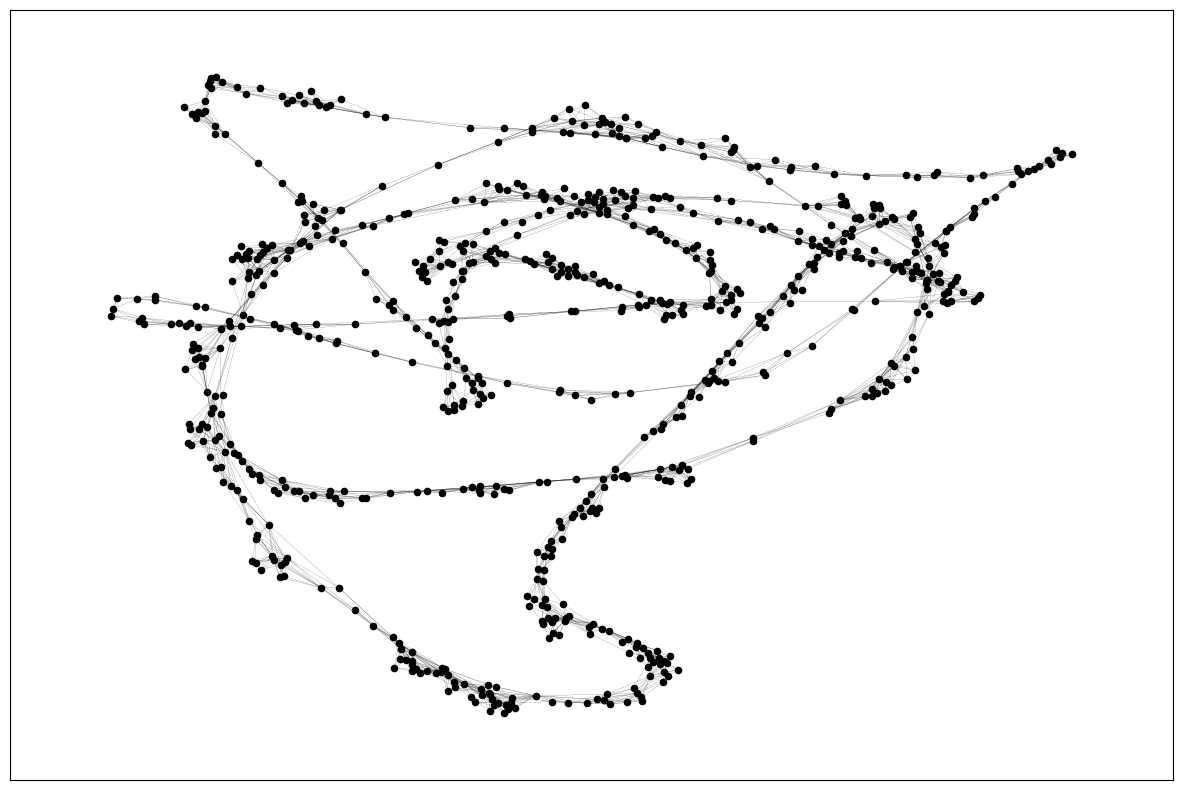

In [314]:
options = {
    'node_color': 'black',
    'node_size': 20,
    'width': 0.1,
    'with_labels' : False
}
nx.draw_networkx(G,**options)

Clauset-Newman-Moore greedy modularity maximization

In [270]:
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True) 
print(f"The graph has {len(communities)} communities.")

The graph has 9 communities.


In [316]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

In [317]:
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

In [318]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)      

In [319]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

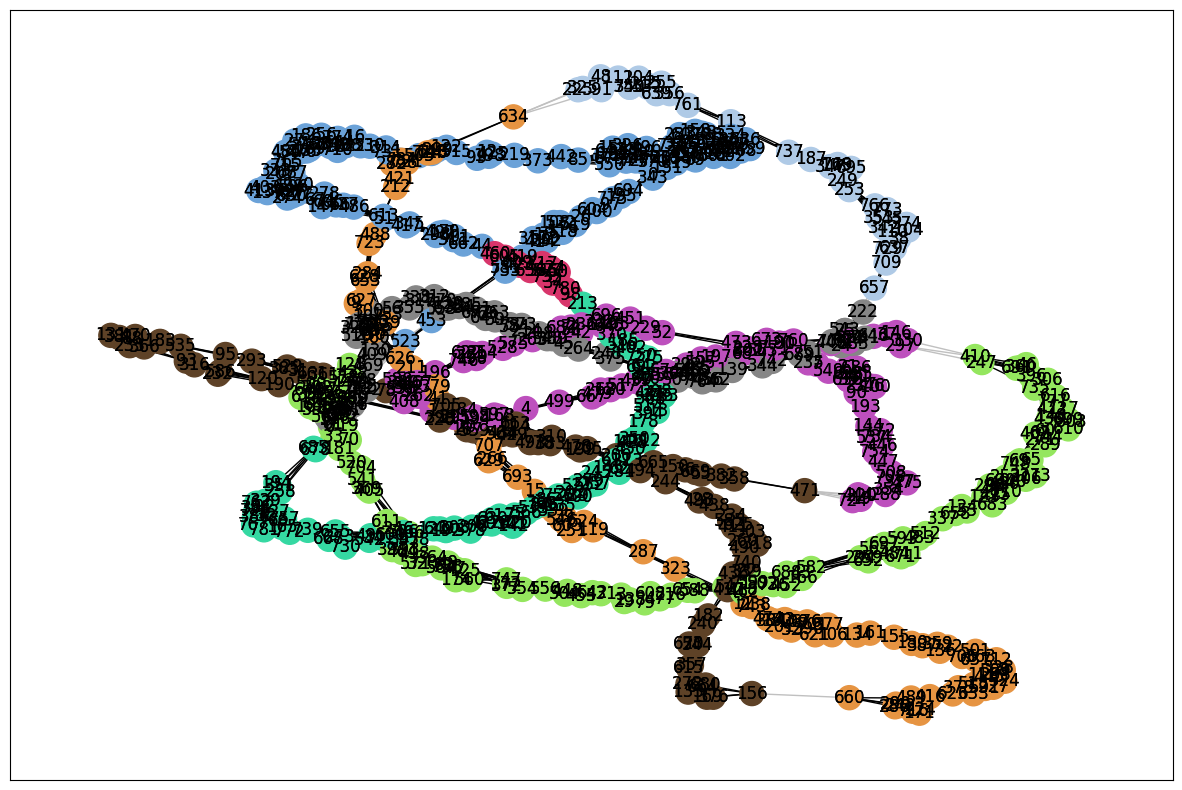

In [320]:
g_pos = nx.spring_layout(G)

plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(
    G,
    pos=g_pos,
    node_size=0,
    edgelist=external,
    edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(
    G,
    pos=g_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

Girvan-Newman Community Detection

In [282]:
result = nxcom.girvan_newman(G)
communities_g_n = next(result)
print(f"The graph has {len(communities_g_n)} communities.")

The graph has 2 communities.


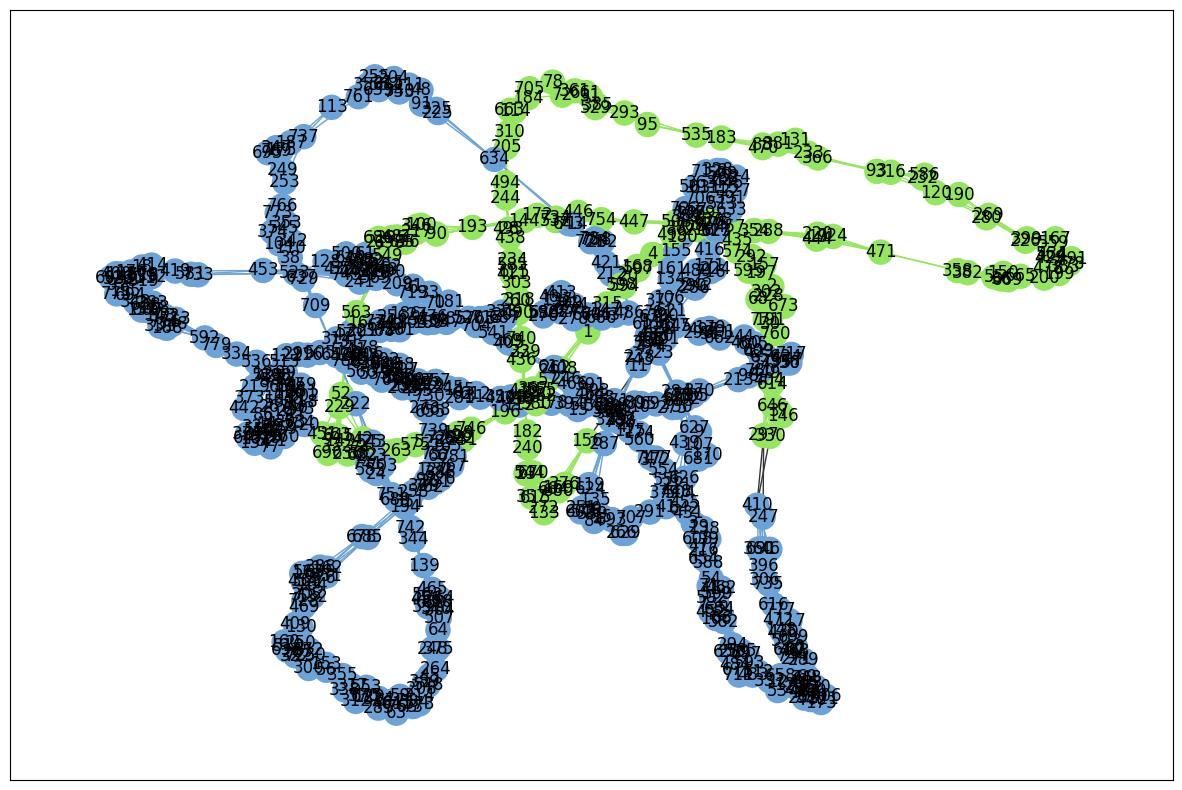

In [321]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Set node and edge communities
set_node_community(G, communities_g_n)
set_edge_community(G)

# Set community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

g_pos = nx.spring_layout(G)
# Draw external edges
nx.draw_networkx(
    G, pos=g_pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(
    G, pos=g_pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color)

Cliques

In [324]:
cliques = list(nx.find_cliques(G))
max_clique = max(cliques, key=len)

print(max_clique) # an example of a max clique. not necessarily unique

[7, 549, 35, 636, 698, 481]
